                                                 text lang  \
0   RT @joanwalsh: Marjory Stoneman Douglas studen...   en   
1   RT @lsmith4680: Did Lindsey Vonn shed a Libera...   en   
2   RT @steph93065: Has anyone reported whether or...   en   
3   RT @realDonaldTrump: “Charges Deal Don A Big W...   en   
4   @Anthony21Mets @CNN Shut the fuck up, you Trum...   en   
5   RT @TeaPainUSA: With all due respect, Ms. Huck...   en   
6   RT @southern4MAGA: @tariqnasheed Why Don’t you...   en   
7   RT @PatrioticCindy: #Russian didn’t disintegra...   en   
8   @FoxNews @JudgeJeanine I’m still hoping that o...   en   
9   RT @EvansPosts: I think you meant to say “Niko...   en   
10                         No https://t.co/MtzMXIcWw0  und   
11  @EricTrump You told me your last name one day ...   en   
12  RT @nathessing: Sorry is something you say whe...   en   
13  RT @PCunningham313: @Franklin_Graham God just ...   en   
14  RT @RealJamesWoods: This gets better and bette...   en   
15  RT @

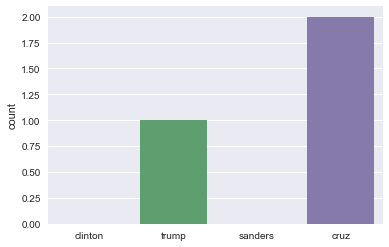

In [7]:
#Exaple using mock twitter API
import tweepy
import pandas as pd
import json

# Store OAuth authentication credentials in relevant variables
access_token = "297830336-S3tJx9S96ED5N6OdBQwQ9XuPYuA1hZdwavdTRzt8"
access_token_secret = "5dt2z8jqdUDS5rUhjbYAmTKLm7Yul3m2zXUaHg6XXMQDQ"
consumer_key = "B6bbx1F9M4mprO0GIytBDIkq1"
consumer_secret = "f5pRfYvQ1hlj9vruxnmwwW1Jypwa0KzG9GqgIkgH3hr3gSEfuh"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#Class definition
class MyStreamListener(tweepy.StreamListener):
    def __init__(self, api=None):
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open("tweets.txt", "w")

    def on_status(self, status):
        tweet = status._json
        self.file.write( json.dumps(tweet) + '\n' )
        self.num_tweets += 1
        if self.num_tweets < 100:
            return True
        else:
            return False
        self.file.close()

    def on_error(self, status):
        print(status)
        
# Initialize Stream listener
l = MyStreamListener()

# Create you Stream object with authentication
stream = tweepy.Stream(auth, l)

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track = ['clinton', 'trump', 'sanders', 'cruz'])

# String of path to file: tweets_data_path
tweets_data_path= 'tweets.txt'

# Initialize empty list to store tweets: tweets_data
tweets_data = []

# Open connection to file
tweets_file = open(tweets_data_path, "r")

# Read in tweets and store in list: tweets_data
for line in tweets_file:
    tweet = json.loads(line)
    tweets_data.append(tweet)

# Close connection to file
tweets_file.close()

# Print the keys of the first tweet dict
#print(tweets_data[0].keys())

# Build DataFrame of tweet texts and languages
df = pd.DataFrame(tweets_data, columns=['text', 'lang', 'created_at'])

# Print head of DataFrame
print(df[0:100])

#Text analysis
import re

def word_in_text(word, tweet):
    word = word.lower()
    text = tweet.lower()
    match = re.search(word, tweet)

    if match:
        return True
    return False

# Initialize list to store tweet counts
[clinton, trump, sanders, cruz] = [0, 0, 0, 0]

# Iterate through df, counting the number of tweets in which
# each candidate is mentioned
for index, row in df.iterrows():
    clinton += word_in_text('clinton', row['text'])
    trump += word_in_text('trump', row['text'])
    sanders += word_in_text('sanders', row['text'])
    cruz += word_in_text('cruz', row['text'])
    
# Import packages
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set(color_codes=True)

# Create a list of labels:cd
cd = ['clinton', 'trump', 'sanders', 'cruz']

# Plot histogram
ax = sns.barplot(cd, [clinton, trump, sanders, cruz])
ax.set(ylabel="count")
plt.show()